# Practica Nº 08: Demostración indirecta de las leyes de Mendel


**Curso:** Biología para Ciencias e Ingeniería

**Docente:** Mg. Angela Renee Arias Ramírez


In [1]:
import itertools
import random
from dataclasses import dataclass

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")
matplotlib.rcParams["font.family"] = "monospace"

## Paso A

Para este primer paso necesitamos sacar, de manera aleatoria, un par de genes al menos unas 100 veces, en donde se establecera el genotipo como A (dominante) o a (recesivo).


Comenzaremos definiendo una clase que nos perimitirá realizar las operaciones entre los genes. Esta clase será llamada `Frijol` en referencia a los materiales solicitados inicialmente por el manual de laboratorio.

In [2]:
def sort_capital_letters(s):
    return "".join(sorted(s, key=str.isupper, reverse=True))


def chunkstring(string, length):
    return (string[0 + i : length + i] for i in range(0, len(string), length))


@dataclass
class Frijol:
    padre: str
    madre: str
    gen: str

    def __post_init__(self):
        self.genlist = list(chunkstring(self.gen, 2))
        self.genset = {x.lower() for x in itertools.chain.from_iterable(self.genlist)}

    def __len__(self):
        return len(self.gen)

    def __add__(self, other):
        if self.genset == other.genset:
            gen = "".join(
                [
                    sort_capital_letters(random.choices(left) + random.choices(right))
                    for left, right in zip(self.genlist, other.genlist)
                ]
            )
        else:
            gen = self.gen + other.gen
        return Frijol(padre=self.gen, madre=other.gen, gen=gen)

El experimento con frijoles solicitado por el laboratorio pide mezclar en una bolsa frijoles de dos colores distintos, en donde cada color representa un gen ya sea dominante (A) o recesivo (a).

Haciendo uso de la clase definida, representaremos esta bolsa como los hijos de un padre y madre ambos con genotipo `Aa`. El genotipo del hijo será generado de manera aleatoria, simulando el experimento aleatorio de la bolsa.

In [3]:
# Le agregamos los detalles de padre y madre a nuestro
# frijol inicial. Esto es solo para mantener consistencia.
# Los hijos registraran al padre y a la madre que los crearon.
padre_a = Frijol(padre="AA", madre="aa", gen="Aa")
madre_a = padre_a
print(f"Frijol padre: {padre_a}")
print(f"Frijol madre: {madre_a}")

Frijol padre: Frijol(padre='AA', madre='aa', gen='Aa')
Frijol madre: Frijol(padre='AA', madre='aa', gen='Aa')


### Prueba de aleatoriedad en la funcion definida

Probamos que la combinación del padre y madre nos dara un hijo aleatorio cada vez

In [4]:
for i in range(1, 6):
    print(f"Frijol hijo {i}: {padre_a + madre_a}")

Frijol hijo 1: Frijol(padre='Aa', madre='Aa', gen='Aa')
Frijol hijo 2: Frijol(padre='Aa', madre='Aa', gen='AA')
Frijol hijo 3: Frijol(padre='Aa', madre='Aa', gen='aa')
Frijol hijo 4: Frijol(padre='Aa', madre='Aa', gen='Aa')
Frijol hijo 5: Frijol(padre='Aa', madre='Aa', gen='Aa')


Ahora repetimos esto unas 100 veces para simular el experimento de la bolsa

In [5]:
nveces = 100

resultados_a = pd.DataFrame([padre_a + madre_a for i in range(nveces)])

# Mostramos los primeros 5 resultados
resultados_a.head()

,padre,madre,gen
0,Aa,Aa,Aa
1,Aa,Aa,AA
2,Aa,Aa,Aa
3,Aa,Aa,aa
4,Aa,Aa,AA


Solo nos interesa ver las frecuencias de nuestros resultados en la columna `gen`, por lo que podemos usar `pd.value_counts()` para obtener una serie con las frecuencias de cada gen.

In [6]:
frecuencias_a = resultados_a.gen.value_counts()
frecuencias_a

Aa    46
AA    27
aa    27
Name: gen, dtype: int64

Text(0.5, 1.0, 'Frecuencia de genotipos')

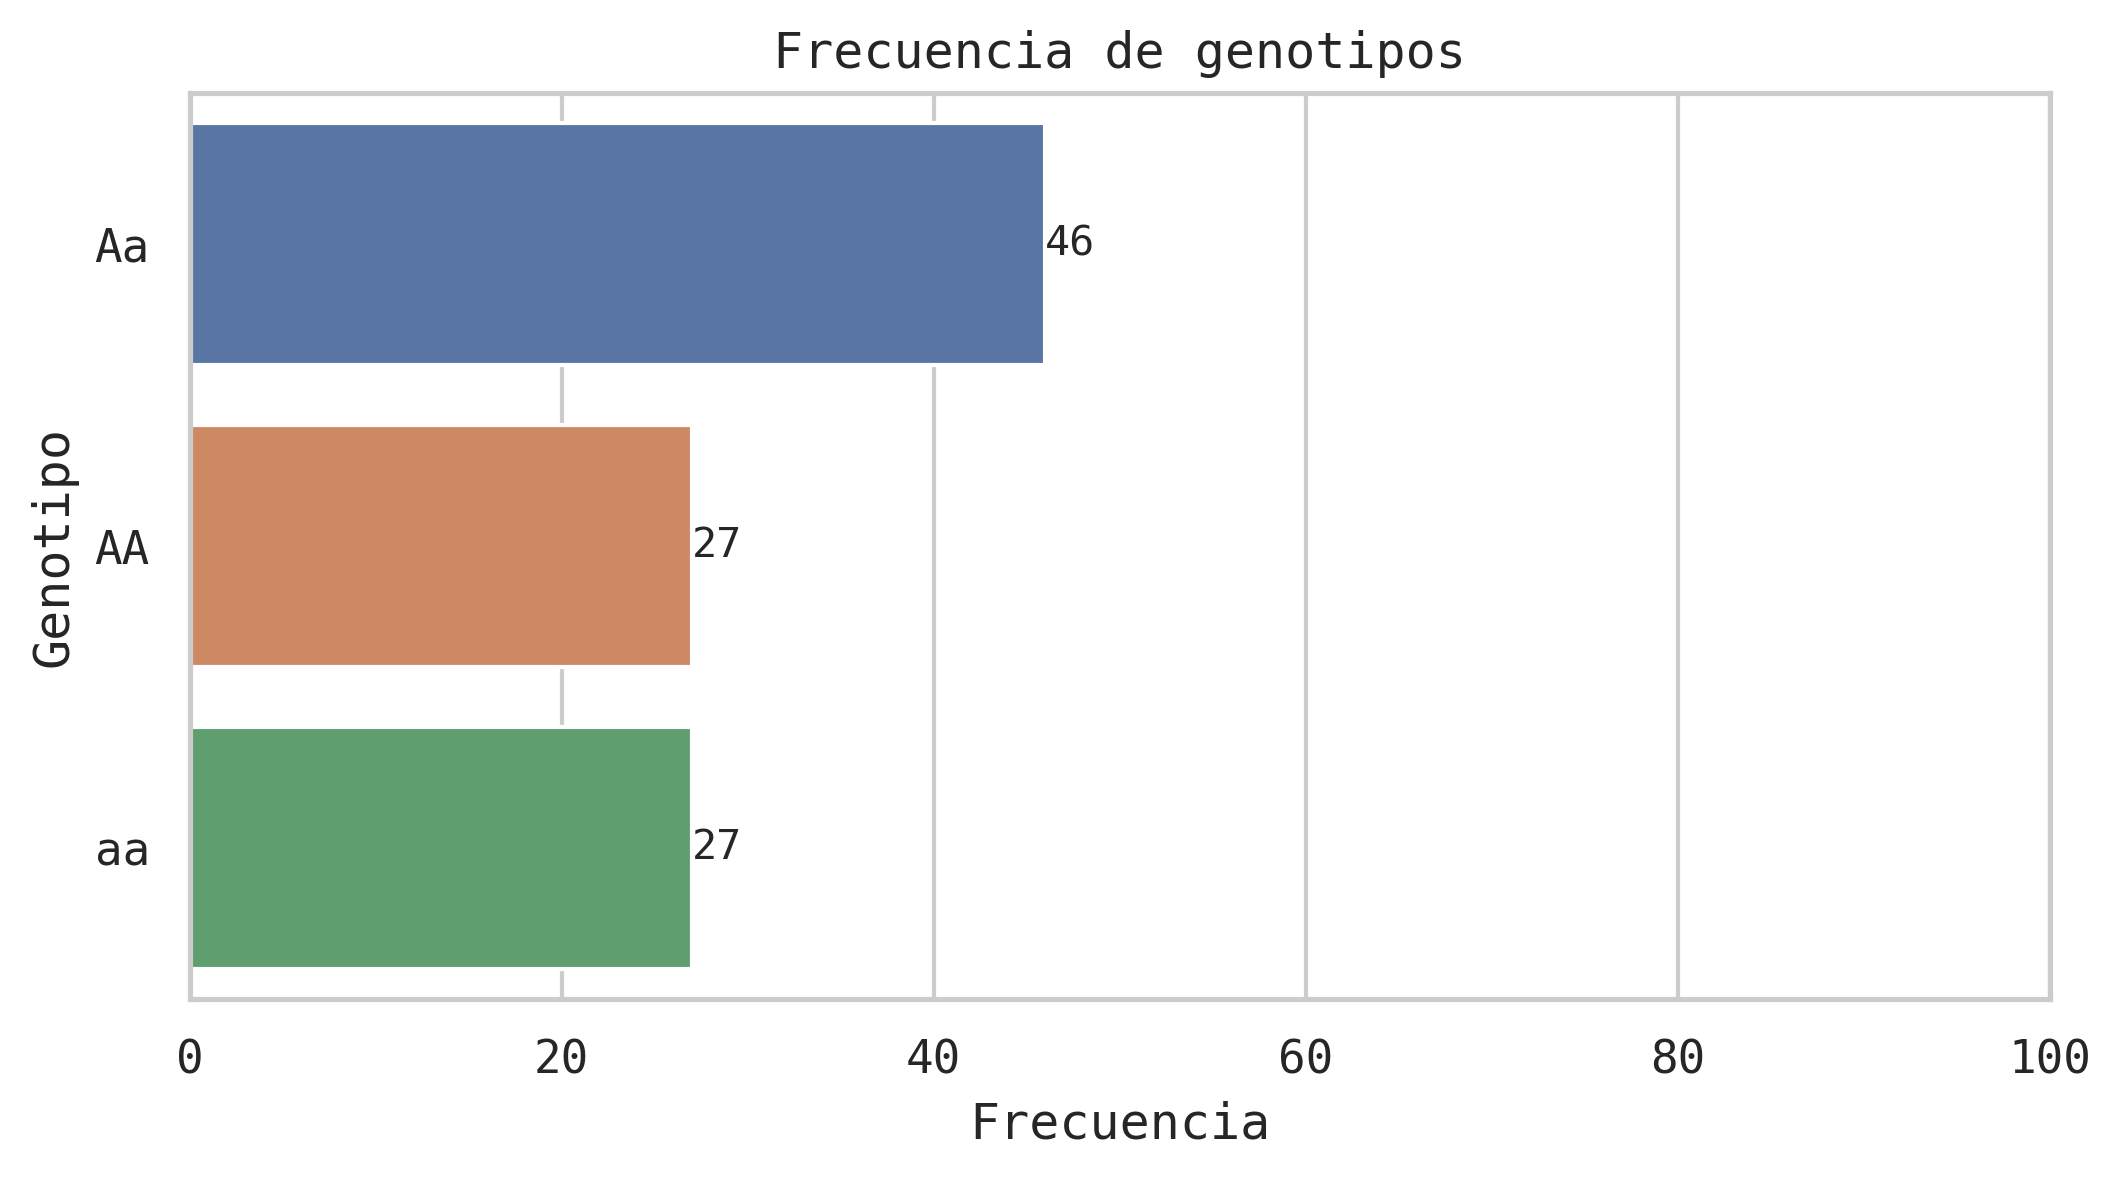

In [7]:
fig, ax = plt.subplots(dpi=300, figsize=(8, 4))
sns.barplot(y=frecuencias_a.index, x=frecuencias_a.values, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlim(0, 100)
ax.set_ylabel("Genotipo")
ax.set_xlabel("Frecuencia")
ax.set_title("Frecuencia de genotipos")

Podemos repetir este experimento varias veces para verificar que nuestros resultados no tengan ningun sesgo.

In [8]:
container = []
for j in range(100):
    _res = pd.DataFrame([padre_a + madre_a for i in range(nveces)]).gen.value_counts()
    container.append(_res)
    if j % 25 == 0:
        print(f"\nRepetición numero {j+1}")
        print(_res)
container = pd.DataFrame(container)
container.index = range(1, 101)


Repetición numero 1
Aa    43
AA    30
aa    27
Name: gen, dtype: int64

Repetición numero 26
Aa    46
aa    29
AA    25
Name: gen, dtype: int64

Repetición numero 51
Aa    47
AA    27
aa    26
Name: gen, dtype: int64

Repetición numero 76
Aa    57
aa    28
AA    15
Name: gen, dtype: int64


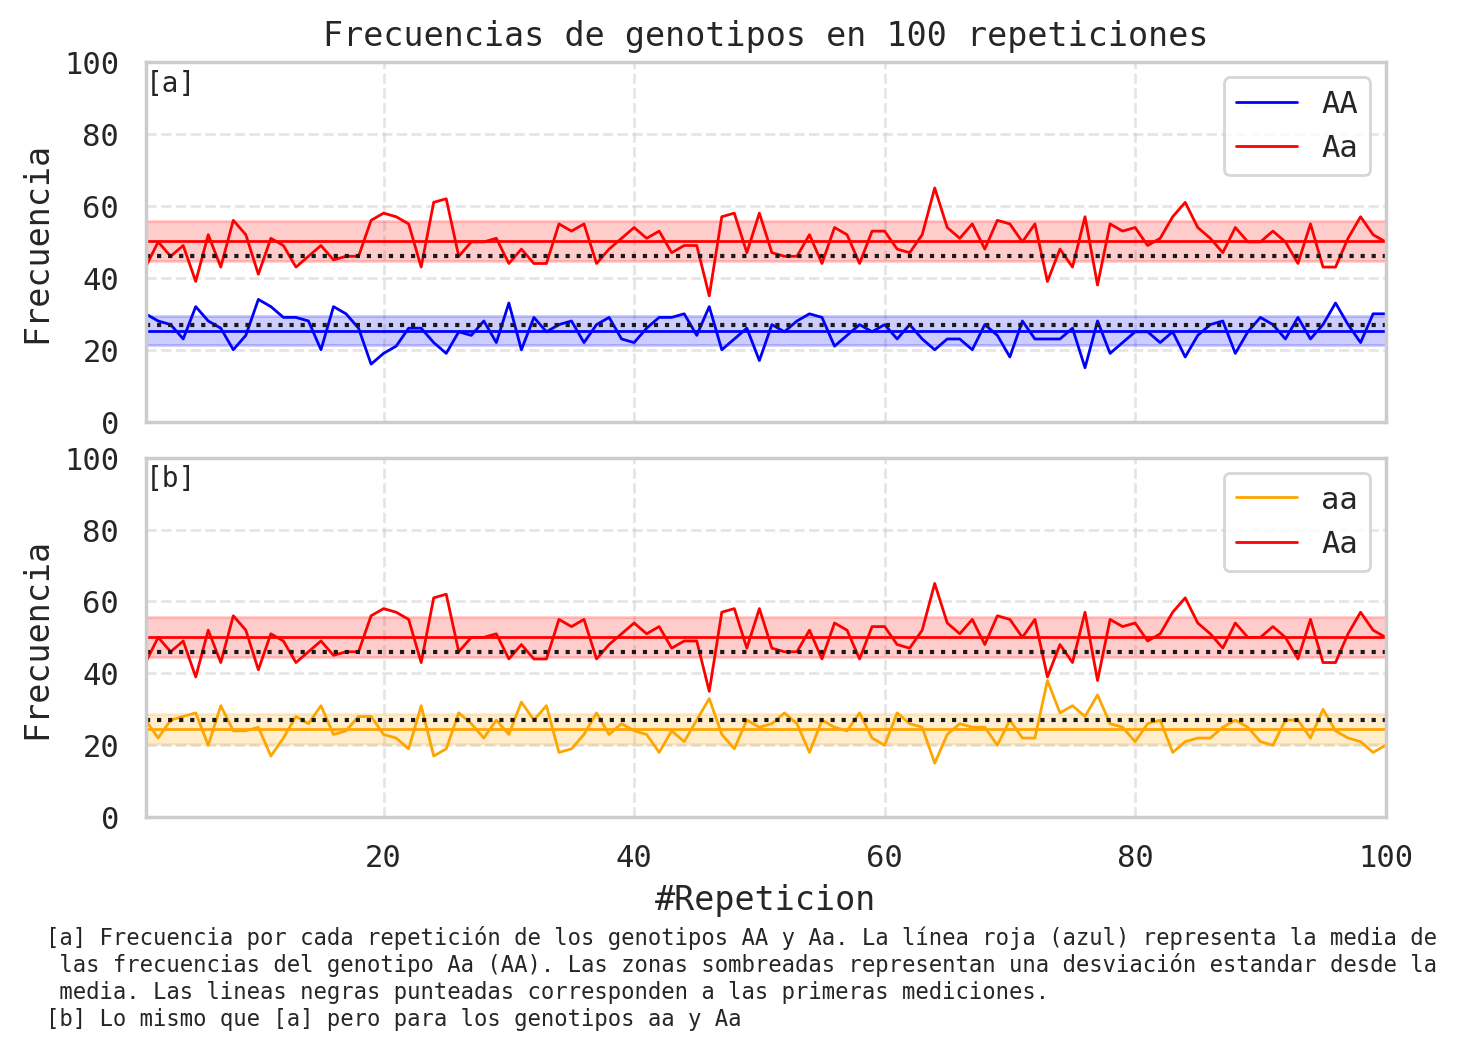

In [9]:
ci = container.std()
fig, axs = plt.subplots(nrows=2, dpi=200, figsize=(8, 5), sharex=True)

axs[0].plot(container.index, container.AA, label="AA", c="blue", lw=1)
axs[0].plot(container.index, container.Aa, label="Aa", c="red", lw=1)

axs[1].plot(container.index, container.aa, label="aa", c="orange", lw=1)
axs[1].plot(container.index, container.Aa, label="Aa", c="red", lw=1)

axs[0].axhline(container.AA.mean(), c="blue", lw=1)
axs[0].axhline(container.Aa.mean(), c="red", lw=1)
axs[1].axhline(container.aa.mean(), c="orange", lw=1)
axs[1].axhline(container.Aa.mean(), c="red", lw=1)

axs[0].fill_between(
    container.index,
    container.AA.mean() - ci.AA,
    container.AA.mean() + ci.AA,
    color="blue",
    alpha=0.2,
)
axs[0].fill_between(
    container.index,
    container.Aa.mean() - ci.Aa,
    container.Aa.mean() + ci.Aa,
    color="red",
    alpha=0.2,
)

axs[1].fill_between(
    container.index,
    container.aa.mean() - ci.aa,
    container.aa.mean() + ci.aa,
    color="orange",
    alpha=0.2,
)
axs[1].fill_between(
    container.index,
    container.Aa.mean() - ci.Aa,
    container.Aa.mean() + ci.Aa,
    color="red",
    alpha=0.2,
)


axs[0].axhline(frecuencias_a.AA, ls="dotted", c="k", lw=1.5)
axs[0].axhline(frecuencias_a.Aa, ls="dotted", c="k", lw=1.5)

axs[1].axhline(frecuencias_a.aa, ls="dotted", c="k", lw=1.5)
axs[1].axhline(frecuencias_a.Aa, ls="dotted", c="k", lw=1.5)

for ax in axs:
    ax.set_ylabel("Frecuencia")

    ax.set_xlim(container.index.min(), container.index.max())
    ax.set_ylim(0, 100)

    ax.legend(loc="upper right")
    ax.grid(ls="--", alpha=0.5)

axs[0].set_title("Frecuencias de genotipos en 100 repeticiones")

axs[0].text(0, 0.98, "[a]", transform=axs[0].transAxes, va="top", ha="left")
axs[1].text(0, 0.98, "[b]", transform=axs[1].transAxes, va="top", ha="left")

axs[1].set_xlabel("#Repeticion")
axs[1].text(
    -0.08,
    -0.3,
    "[a] Frecuencia por cada repetición de los genotipos AA y Aa."
    " La línea roja (azul) representa la media de\n"
    " las frecuencias del genotipo Aa (AA). Las zonas sombreadas representan una desviación estandar desde la\n"
    " media. Las lineas negras punteadas corresponden a las primeras mediciones.\n"
    "[b] Lo mismo que [a] pero para los genotipos aa y Aa",
    ha="left",
    va="top",
    transform=axs[1].transAxes,
    fontsize=8,
)
fig.subplots_adjust(hspace=0.1)

Mediante esta exploración simple vemos que nuestras mediciones iniciales se encuentran dentro o cerca de una desviación estandar alrededor de la media. Cabe resaltar que las mediciones son completamente aleatorias, por lo que las mediciones iniciales podrian encontrarse fuera de lo esperado. Para determinar si nuestras mediciones son aleatorias o siguen alguna regla, se realizará la prueba de chi-cuadrado.

### Prueba de chi-cuadrado $\chi^2$

Para nuestro caso tomamos la hipotesis nula de que las mediciones iniciales siguen una ley natural (leyes de Mendel) para la distribución de los genes en las generaciones. Para confirmar o rechazar esta hipotesis, se realiza la prueba de $\chi^2$ (chi-cuadrado) con un nivel de significancia del 0.05.

In [10]:
resumen_a = pd.DataFrame(
    dict(
        Genotipo=["(AA, Aa)", "aa"],
        Frecuencia=[(frecuencias_a.AA, frecuencias_a.Aa), frecuencias_a.aa],
        Fenotipo=["Negro", "Blanco"],
        Obtenido=[frecuencias_a.AA + frecuencias_a.Aa, frecuencias_a.aa],
        Esperado=[75, 25],
    ),
)
resumen_a["Desvio"] = resumen_a.Obtenido - resumen_a.Esperado
resumen_a

,Genotipo,Frecuencia,Fenotipo,Obtenido,Esperado,Desvio
0,"(AA, Aa)","(27, 46)",Negro,73,75,-2
1,aa,27,Blanco,27,25,2


Usando los cálculos intermedios, obtenemos el valor de la prueba de chi-cuadrado experimental $\chi^2_{exp}$.

In [11]:
# Formula para chi cuadrado
chi_cuadrado = np.round((resumen_a.Desvio**2 / resumen_a.Esperado).sum(), 4)
print(f"Chi cuadrado experimental: {chi_cuadrado}")

Chi cuadrado experimental: 0.2133


Una vez obtenido $\chi^2_{exp}$, verificamos la tabla de probabilidades de chi-cuadrado para verificar si nuestros resultados son significativos. Para ello necesitamos los grados de libertad del sistema, de donde tenemos : 
```
2 opciones (genes) - 1 = 1 grado de libertad
```

In [12]:
# Grados de libertad
dof = len(resultados_a.iloc[0].gen) - 1

# Obtenemos el valor critico de chi cuadrado
# para una probabilidad de 0.05 y nuestro grado de libertad
critical_value = stats.chi2.isf(0.05, dof)
print(f"Grados de libertad: {dof}")
print(f"Chi cuadrado crítico: {critical_value}")

Grados de libertad: 1
Chi cuadrado crítico: 3.8414588206941285


Podemos verificar que $\chi^2_{exp}$ es menor que el valor de la tabla de chi-cuadrado para un nivel de significancia del 0.05, por lo que nuestros resultados son significativos y no son aleatorios, sino que siguen una ley natural.

Esto lo podemos ver de manera gráfica de la siguiente manera

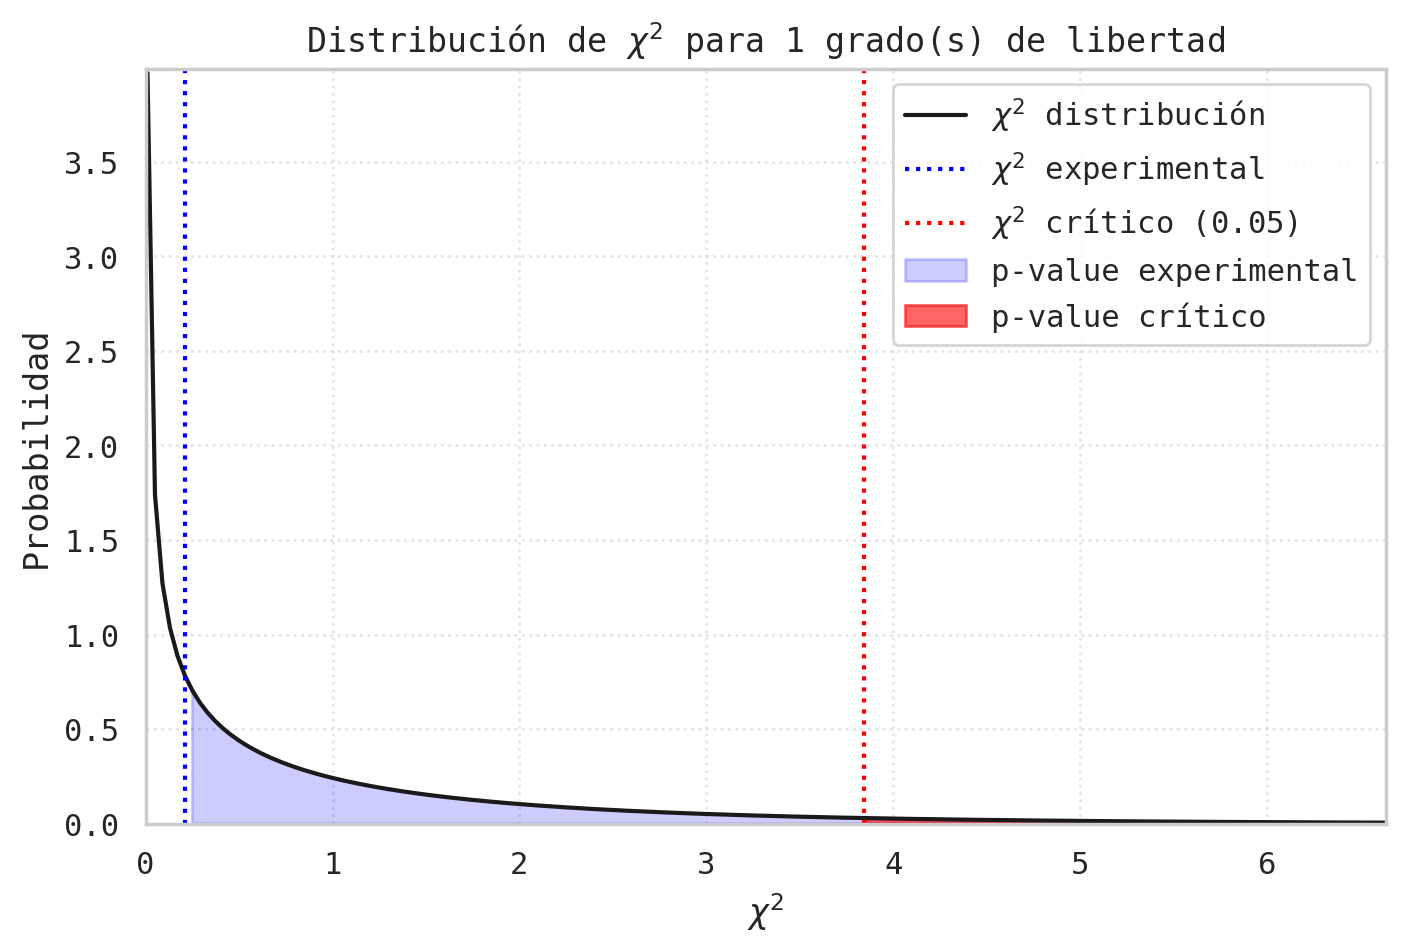

In [13]:
x = np.linspace(0.01, 20, 500)
chi2 = stats.chi2.pdf(x, dof)

fig, ax = plt.subplots(dpi=200, figsize=(8, 5))
ax.plot(x, chi2, c="k", lw=1.5, label=r"$\chi^2$ distribución")

ax.axvline(chi_cuadrado, ls="dotted", c="blue", lw=1.5, label=r"$\chi^2$ experimental")
ax.axvline(
    critical_value, ls="dotted", c="red", lw=1.5, label=r"$\chi^2$ crítico (0.05)"
)

ax.fill_between(
    x,
    0,
    chi2,
    where=x >= chi_cuadrado,
    color="blue",
    alpha=0.2,
    interpolate=True,
    label="p-value experimental",
)
ax.fill_between(
    x,
    0,
    chi2,
    where=x >= critical_value,
    color="red",
    alpha=0.6,
    interpolate=True,
    label="p-value crítico",
)

ax.set_xlim(0, stats.chi2.isf(x[0], dof))
ax.set_ylim(0, chi2.max() + chi2.std() / 10)
ax.set_title(rf"Distribución de $\chi^2$ para {dof} grado(s) de libertad")

ax.set_xlabel(r"$\chi^2$")
ax.set_ylabel("Probabilidad")
ax.legend(loc="upper right")
ax.grid(ls="dotted", alpha=0.5)

El área sombreada bajo la curva de distribución de $\chi^2$ representa el p-value de la prueba de chi-cuadrado, donde `p=0.05` es el valor del área bajo la curva sombreada de rojo, delimitada por la izquierda por la línea del mismo color en $\chi^2$ = 3.8. El área sombreada y línea de color azul representan el valor de $\chi^2_{exp}$.

In [14]:
# Chi cuadrado y p-valor experimental calculado con scipy,
# el resultado para el chi cuadrado es igual al obtenido
# usando la formula manualmente.
stats.chisquare(resumen_a.Obtenido, resumen_a.Esperado)

Power_divergenceResult(statistic=0.21333333333333335, pvalue=0.6441672226837103)

A este nivel de significancia, podemos decir que 95 veces de un total de 100 experimentos, los resultados que sigan una ley natural tendran un $\chi^2$ igual o menor que el valor de la tabla de chi-cuadrado (3.8 para 1 grado de libertad).

Como el $\chi^2_{exp}$  es menor que el valor crítico, aceptamos la hipotesis nula y por ende los resultados no son aleatorios.

## Parte B

La parte B del experimento requiere repetir lo mismo que la parte A, pero ahora cambiando los genes A y a por genes B y b.

In [15]:
# Le agregamos los detalles de padre y madre a nuestro
# frijol inicial. Esto es solo para mantener consistencia.
# Los hijos registraran al padre y a la madre que los crearon.
padre_b = Frijol(padre="BB", madre="bb", gen="Bb")
madre_b = padre_b
print(f"Frijol padre: {padre_b}")
print(f"Frijol madre: {padre_b}")

Frijol padre: Frijol(padre='BB', madre='bb', gen='Bb')
Frijol madre: Frijol(padre='BB', madre='bb', gen='Bb')


In [16]:
nveces = 100

resultados_b = pd.DataFrame([padre_b + madre_b for i in range(nveces)])

# Mostramos los primeros 5 resultados
resultados_b.head()

,padre,madre,gen
0,Bb,Bb,bb
1,Bb,Bb,bb
2,Bb,Bb,bb
3,Bb,Bb,Bb
4,Bb,Bb,BB


Siguiendo las indicaciones de la guia de laboratorio, concatenamos los resultados de la parte A y B en una sola serie.

In [17]:
resultados_ab = resultados_a[["gen"]] + resultados_b[["gen"]]
resultados_ab.head()

,gen
0,Aabb
1,AAbb
2,Aabb
3,aaBb
4,AABB


Con esta nueva tabla, calculamos la frecuencia de cada gen en la columna `gen`.

In [18]:
frecuencias_ab = resultados_ab.gen.value_counts()
frecuencias_ab

AaBb    19
Aabb    17
aaBb    16
AABb    13
AaBB    10
AABB     9
aaBB     6
AAbb     5
aabb     5
Name: gen, dtype: int64

Text(0.5, 1.0, 'Frecuencia de genotipos')

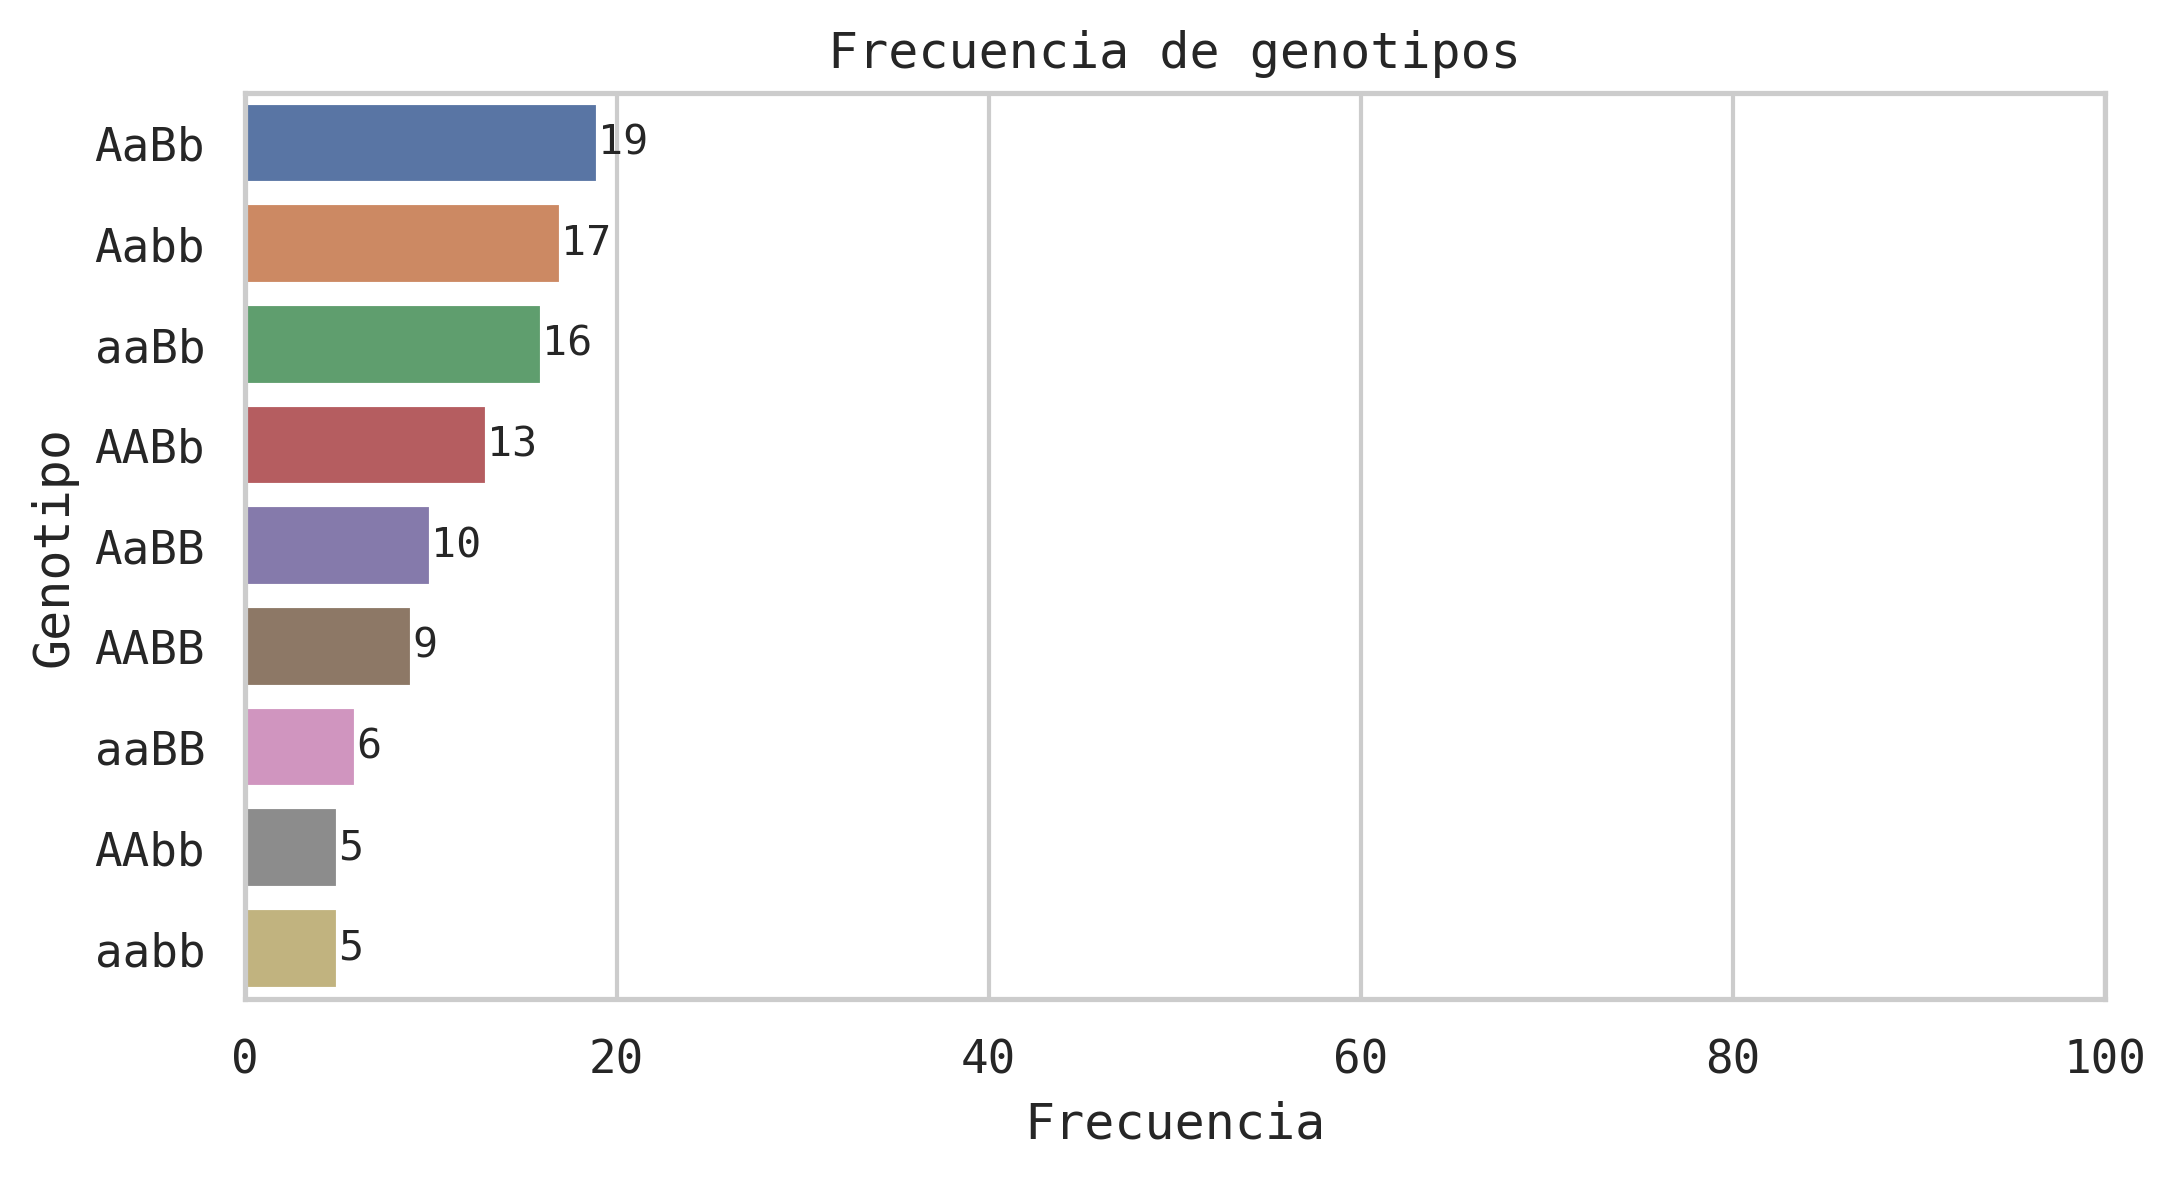

In [19]:
fig, ax = plt.subplots(dpi=300, figsize=(8, 4))
sns.barplot(y=frecuencias_ab.index, x=frecuencias_ab.values, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_xlim(0, 100)
ax.set_ylabel("Genotipo")
ax.set_xlabel("Frecuencia")
ax.set_title("Frecuencia de genotipos")

### Prueba de chi-cuadrado $\chi^2$

In [20]:
resumen_ab = pd.DataFrame(
    dict(
        Genotipo=["(AABB, AABb, AaBB, AaBb)", "(AAbb, Aabb)", "(aaBB, aaBb)", "aabb"],
        Frecuencia=[
            (
                frecuencias_ab.AABB,
                frecuencias_ab.AABb,
                frecuencias_ab.AaBB,
                frecuencias_ab.AaBb,
            ),
            (frecuencias_ab.AAbb, frecuencias_ab.Aabb),
            (frecuencias_ab.aaBB, frecuencias_ab.aaBb),
            frecuencias_ab.aabb,
        ],
        Fenotipo=["Negro Liso", "Negro Rugoso", "Blanco Liso", "Blanco Rugoso"],
        Obtenido=[
            frecuencias_ab.AABB
            + frecuencias_ab.AABb
            + frecuencias_ab.AaBB
            + frecuencias_ab.AaBb,
            frecuencias_ab.AAbb + frecuencias_ab.Aabb,
            frecuencias_ab.aaBB + frecuencias_ab.aaBb,
            frecuencias_ab.aabb,
        ],
        Esperado=[100 * 9 / 16, 100 * 3 / 16, 100 * 3 / 16, 100 * 1 / 16],
    ),
)
resumen_ab["Esperado"] = resumen_ab.Esperado.apply(lambda x: np.round(x, 2))
resumen_ab["Desvio"] = resumen_ab.Obtenido - resumen_ab.Esperado
resumen_ab

,Genotipo,Frecuencia,Fenotipo,Obtenido,Esperado,Desvio
0,"(AABB, AABb, AaBB, AaBb)","(9, 13, 10, 19)",Negro Liso,51,56.25,-5.25
1,"(AAbb, Aabb)","(5, 17)",Negro Rugoso,22,18.75,3.25
2,"(aaBB, aaBb)","(6, 16)",Blanco Liso,22,18.75,3.25
3,aabb,5,Blanco Rugoso,5,6.25,-1.25


Calculamos el valor de $\chi^2_{exp}$ para la parte B.

In [21]:
# Formula para chi cuadrado
chi_cuadrado_ab = np.round((resumen_ab.Desvio**2 / resumen_ab.Esperado).sum(), 4)
print(f"Chi cuadrado experimental: {chi_cuadrado_ab}")

Chi cuadrado experimental: 1.8667


In [22]:
# Grados de libertad
dof_ab = len(resultados_ab.iloc[0].gen) - 1

# Obtenemos el valor critico de chi cuadrado
# para una probabilidad de 0.05 y nuestro grado de libertad
critical_value_ab = stats.chi2.isf(0.05, dof_ab)
print(f"Grados de libertad: {dof_ab}")
print(f"Chi cuadrado crítico: {critical_value_ab}")

Grados de libertad: 3
Chi cuadrado crítico: 7.814727903251178


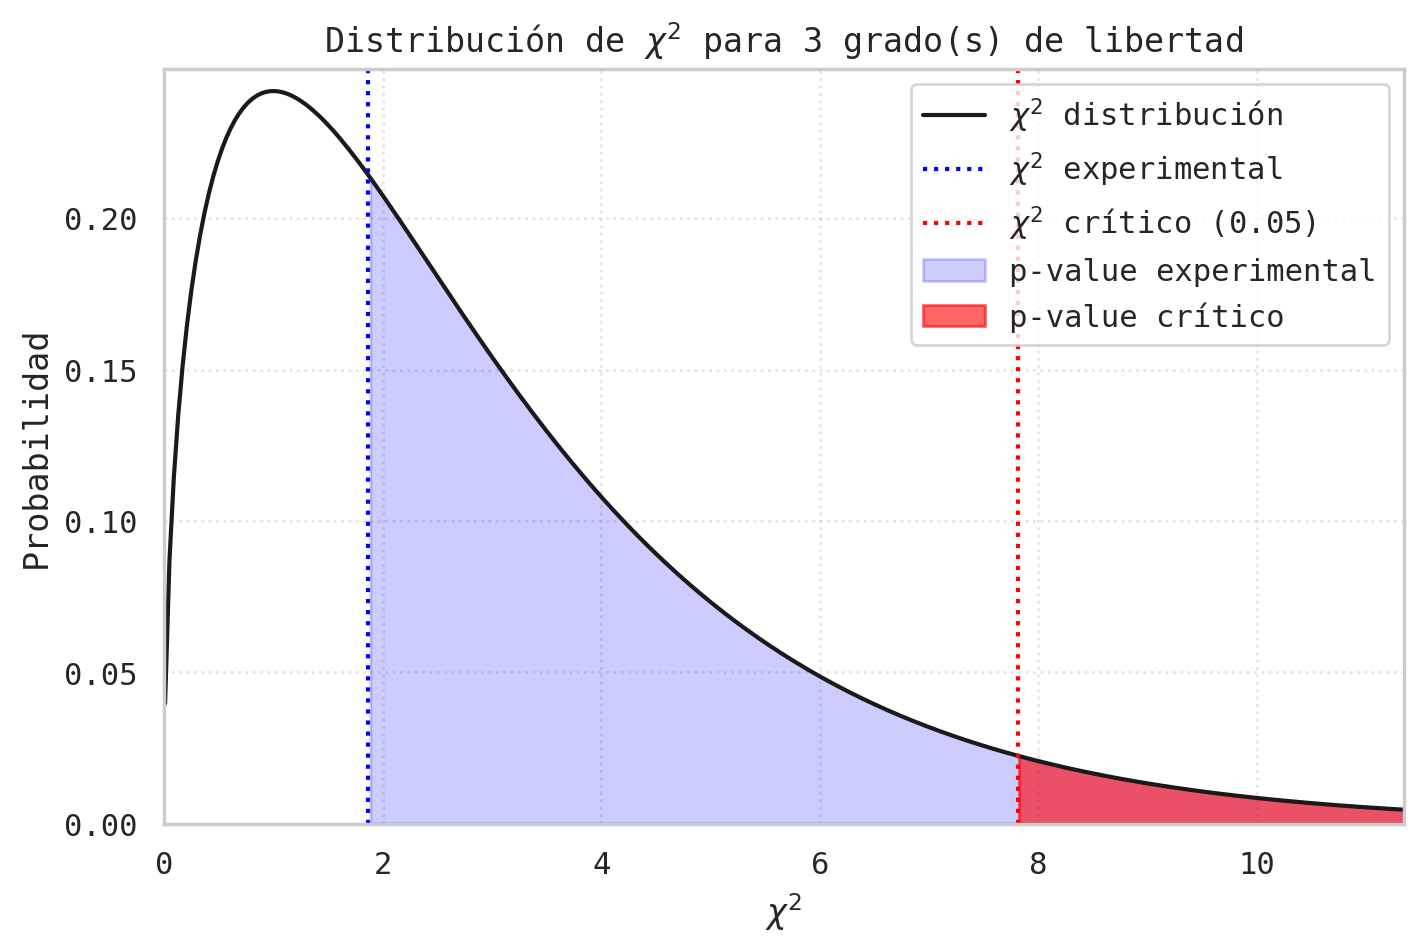

In [23]:
x = np.linspace(0.01, 20, 500)
chi2 = stats.chi2.pdf(x, dof_ab)

fig, ax = plt.subplots(dpi=200, figsize=(8, 5))
ax.plot(x, chi2, c="k", lw=1.5, label=r"$\chi^2$ distribución")

ax.axvline(
    chi_cuadrado_ab, ls="dotted", c="blue", lw=1.5, label=r"$\chi^2$ experimental"
)
ax.axvline(
    critical_value_ab, ls="dotted", c="red", lw=1.5, label=r"$\chi^2$ crítico (0.05)"
)

ax.fill_between(
    x,
    0,
    chi2,
    where=x >= chi_cuadrado_ab,
    color="blue",
    alpha=0.2,
    interpolate=True,
    label="p-value experimental",
)
ax.fill_between(
    x,
    0,
    chi2,
    where=x >= critical_value_ab,
    color="red",
    alpha=0.6,
    interpolate=True,
    label="p-value crítico",
)

ax.set_xlim(0, stats.chi2.isf(x[0], dof_ab))
ax.set_ylim(0, chi2.max() + chi2.std() / 10)
ax.set_title(rf"Distribución de $\chi^2$ para {dof_ab} grado(s) de libertad")

ax.set_xlabel(r"$\chi^2$")
ax.set_ylabel("Probabilidad")
ax.legend(loc="upper right")
ax.grid(ls="dotted", alpha=0.5)

El área sombreada bajo la curva de distribución de $\chi^2$ representa el p-value de la prueba de chi-cuadrado, donde `p=0.05` es el valor del área bajo la curva sombreada de rojo, delimitada por la izquierda por la línea del mismo color en $\chi^2$ = 7.8. El área sombreada y línea de color azul representan el valor de $\chi^2_{exp}$.

De igual manera que en la parte A, calculamos el p-value de la prueba de chi-cuadrado para la parte B.

In [24]:
# Chi cuadrado y p-valor experimental calculado con scipy,
# el resultado para el chi cuadrado es igual al obtenido
# usando la formula manualmente.
stats.chisquare(resumen_ab.Obtenido, resumen_ab.Esperado)

Power_divergenceResult(statistic=1.8666666666666667, pvalue=0.6005360648973186)

Como el $\chi^2_{exp}$  es menor que el valor crítico, aceptamos la hipotesis nula y por ende los resultados, nuevamente, no son aleatorios.

## Incrementando el espacio muestral

Repetiremos nuevamente el experimento pero incrementando la cantidad de muestras de 100 a 1.000.000.

In [25]:
nveces = 1_000_000

gen_a = pd.DataFrame([padre_a + madre_a for i in range(nveces)])
gen_b = pd.DataFrame([padre_b + madre_b for i in range(nveces)])
gen_ab = gen_a[["gen"]] + gen_b[["gen"]]
freq_ab = gen_ab.gen.value_counts()

In [26]:
freq_ab

AaBb    249597
AaBB    125325
aaBb    125088
Aabb    125059
AABb    124973
aabb     62740
AABB     62630
AAbb     62518
aaBB     62070
Name: gen, dtype: int64

In [27]:
summary = pd.DataFrame(
    dict(
        Genotipo=["(AABB, AABb, AaBB, AaBb)", "(AAbb, Aabb)", "(aaBB, aaBb)", "aabb"],
        Frecuencia=[
            (freq_ab.AABB, freq_ab.AABb, freq_ab.AaBB, freq_ab.AaBb),
            (freq_ab.AAbb, freq_ab.Aabb),
            (freq_ab.aaBB, freq_ab.aaBb),
            freq_ab.aabb,
        ],
        Fenotipo=["Negro Liso", "Negro Rugoso", "Blanco Liso", "Blanco Rugoso"],
        Obtenido=[
            freq_ab.AABB + freq_ab.AABb + freq_ab.AaBB + freq_ab.AaBb,
            freq_ab.AAbb + freq_ab.Aabb,
            freq_ab.aaBB + freq_ab.aaBb,
            freq_ab.aabb,
        ],
        Esperado=[nveces * 9 / 16, nveces * 3 / 16, nveces * 3 / 16, nveces * 1 / 16],
    ),
)
summary["Esperado"] = summary.Esperado.apply(lambda x: np.round(x, 2))
summary["Desvio"] = summary.Obtenido - summary.Esperado
summary

,Genotipo,Frecuencia,Fenotipo,Obtenido,Esperado,Desvio
0,"(AABB, AABb, AaBB, AaBb)","(62630, 124973, 125325, 249597)",Negro Liso,562525,562500.0,25.0
1,"(AAbb, Aabb)","(62518, 125059)",Negro Rugoso,187577,187500.0,77.0
2,"(aaBB, aaBb)","(62070, 125088)",Blanco Liso,187158,187500.0,-342.0
3,aabb,62740,Blanco Rugoso,62740,62500.0,240.0


In [28]:
# Formula para chi cuadrado
chi_sqr = np.round((summary.Desvio**2 / summary.Esperado).sum(), 4)
print(f"Chi cuadrado experimental: {chi_sqr}")

Chi cuadrado experimental: 1.5781


In [29]:
# Grados de libertad
dof_ext = len(gen_ab.iloc[0].gen) - 1

# Obtenemos el valor critico de chi cuadrado
# para una probabilidad de 0.05 y nuestro grado de libertad
crit_val = stats.chi2.isf(0.05, dof_ext)
print(f"Grados de libertad: {dof_ext}")
print(f"Chi cuadrado crítico: {crit_val}")

Grados de libertad: 3
Chi cuadrado crítico: 7.814727903251178


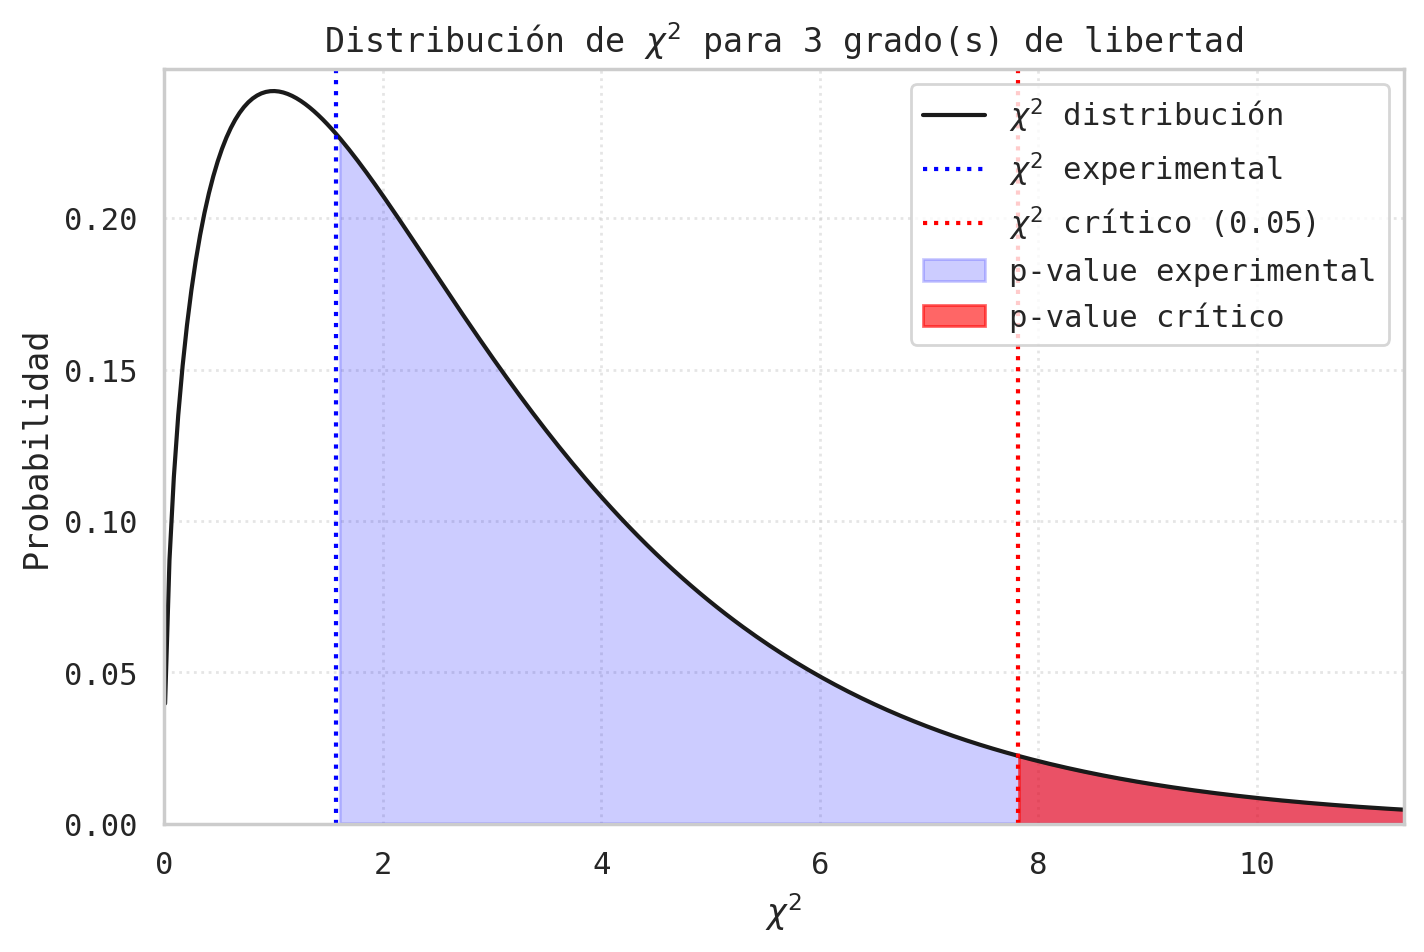

In [30]:
x = np.linspace(0.01, 20, 500)
chi2 = stats.chi2.pdf(x, dof_ext)

fig, ax = plt.subplots(dpi=200, figsize=(8, 5))
ax.plot(x, chi2, c="k", lw=1.5, label=r"$\chi^2$ distribución")

ax.axvline(chi_sqr, ls="dotted", c="blue", lw=1.5, label=r"$\chi^2$ experimental")
ax.axvline(crit_val, ls="dotted", c="red", lw=1.5, label=r"$\chi^2$ crítico (0.05)")

ax.fill_between(
    x,
    0,
    chi2,
    where=x >= chi_sqr,
    color="blue",
    alpha=0.2,
    interpolate=True,
    label="p-value experimental",
)
ax.fill_between(
    x,
    0,
    chi2,
    where=x >= crit_val,
    color="red",
    alpha=0.6,
    interpolate=True,
    label="p-value crítico",
)

ax.set_xlim(0, stats.chi2.isf(x[0], dof_ext))
ax.set_ylim(0, chi2.max() + chi2.std() / 10)
ax.set_title(rf"Distribución de $\chi^2$ para {dof_ext} grado(s) de libertad")

ax.set_xlabel(r"$\chi^2$")
ax.set_ylabel("Probabilidad")
ax.legend(loc="upper right")
ax.grid(ls="dotted", alpha=0.5)

Como resultado se tiene que, para una gran cantidad de muestras, el test de chi-cuadrado se encuentra muy por dentro de la zona que verifica la hipotesis nula, con un p-value cercano a 1.

In [31]:
stats.chisquare(summary.Obtenido, summary.Esperado)

Power_divergenceResult(statistic=1.5781404444444445, pvalue=0.6643564211357913)